In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [2]:
df=pd.read_csv('decision.csv')
df

,CGPA,Communication,Aptitude,Programming Skill,Job Offered
0,2,1,1,1,1
1,1,1,1,1,1
2,0,0,0,1,0
3,0,1,0,0,0
4,2,1,1,0,1
5,2,1,1,1,1
6,1,0,0,0,0
7,1,0,0,1,0
8,2,0,1,1,1
9,1,1,1,1,1


In [3]:
# 2-high
# 1-medium
# 0-low

# 1-good
# 0-poor
# 1-good
# 0-poor
# 1-good
# 0-poor
# 1-yes
# 0-no

In [4]:
# -p*log base2p

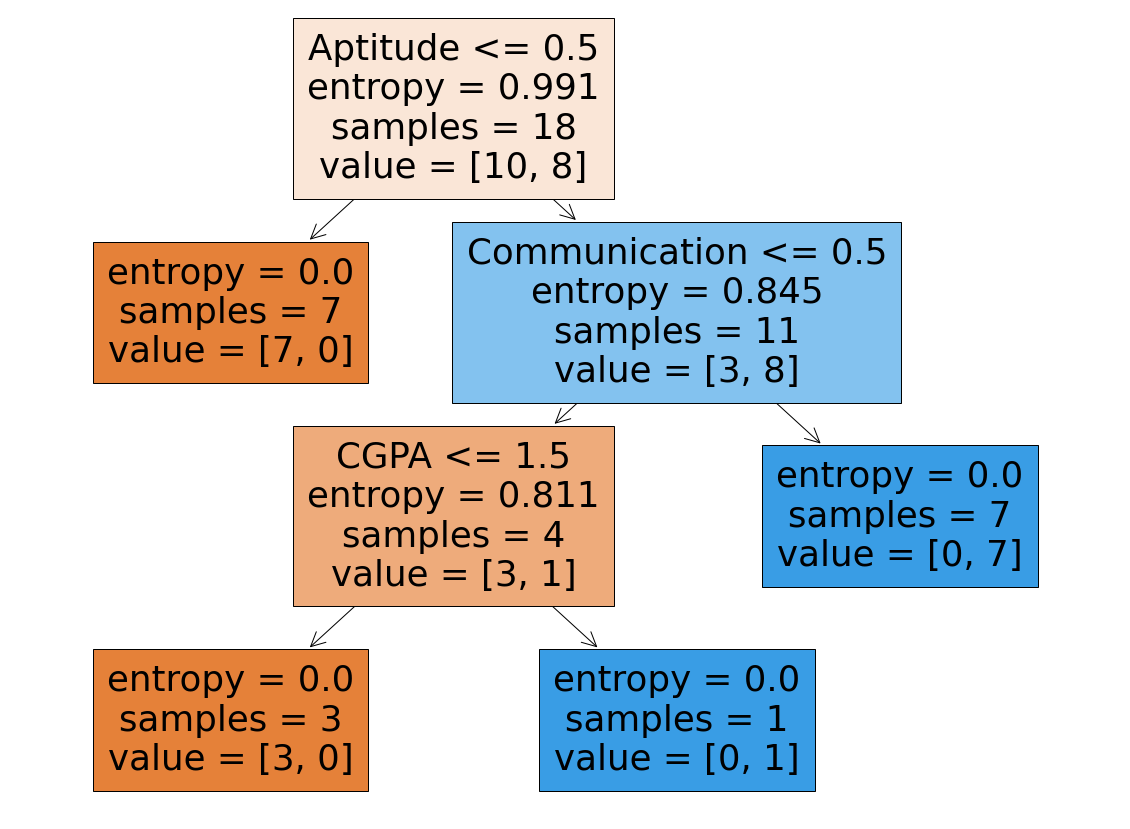

In [5]:
# job offer
from sklearn.tree import DecisionTreeClassifier
d_tree=DecisionTreeClassifier(criterion='entropy',max_depth=4)
x=df.drop('Job Offered',axis=1)
y=df['Job Offered']
m=d_tree.fit(x,y)
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(d_tree,filled=True,feature_names=['CGPA','Communication','Aptitude','Programming Skill'])
plt.show()
# (6/18)
# entropy 

In [6]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df=pd.get_dummies(data=df,drop_first=True)

In [10]:
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [11]:
x=df.drop(columns=['charges'])
y=df['charges']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [13]:
lr=LinearRegression()

In [14]:
lr.fit(x_train,y_train)

LinearRegression()

In [15]:
y_pred=lr.predict(x_test)

In [16]:
print(r2_score(y_pred,y_test))

0.7088351277198341


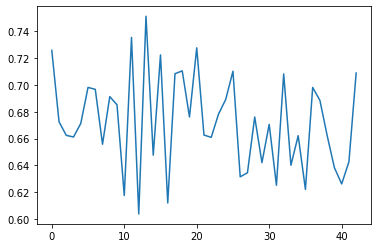

In [17]:
n=range(0,43)
r2s=[]
for i in n:
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.2)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2s.append(r2_score(y_pred,y_test))
plt.plot(r2s)
    
    
    

In [18]:
# polynomial model

In [19]:
poly=PolynomialFeatures(degree=3)
x_train=poly.fit_transform(x_train)

In [20]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [21]:
x_new=poly.fit_transform(x_test)
y_new=lr.predict(x_new)
print(y_new)

[11172.69360352  4670.01318359 30492.09130859  8964.85009766
 24704.72802734  4924.04907227  5092.53930664 13994.38525391
  6205.80981445 11235.44165039 17254.81005859  9128.34082031
  4433.34643555 47545.69335938 53099.00708008 44910.95532227
 10528.3203125  40971.5480957   9289.11816406 24868.96289062
  3166.90576172  8149.76416016  1871.32055664  5984.86279297
 11477.68334961 12956.18334961 14300.55200195  7203.15087891
 11829.79370117  3257.73901367  8535.66650391 12035.92871094
  2978.00805664  5957.24584961  4008.31445312 11281.54394531
  4358.0859375   8942.45410156 22539.71826172 37864.79125977
  5368.61572266  6674.52490234 13457.56811523 14359.62109375
  6334.84594727 12505.95117188  8564.39868164  5312.91796875
 41693.97924805  6238.82568359 16902.10620117  4668.59179688
  6459.49975586  1460.89355469 13111.23828125 11763.87353516
  4052.88549805 37448.57666016 13908.61694336 12823.32543945
 15292.24291992  3447.68847656 14682.52490234  8420.62768555
 12058.03979492  6190.56

In [22]:
print(r2_score(y_new,y_test))

0.8252209124076798


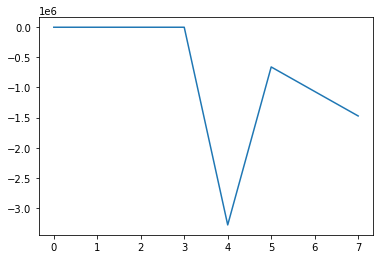

In [23]:
n=range(2,10)
r2s=[]
for i in n:
    poly=PolynomialFeatures(degree=i)
    x_new=poly.fit_transform(x)
    x_train,x_test,y_train,y_test=train_test_split(x_new,y,random_state=10,test_size=0.2)
    reg=LinearRegression()
    reg.fit(x_train,y_train)
    y_pred=reg.predict(x_test)
    r2s.append(r2_score(y_test,y_pred))
plt.plot(r2s)
    